Number of nodes: 834
Number of edges: 4721


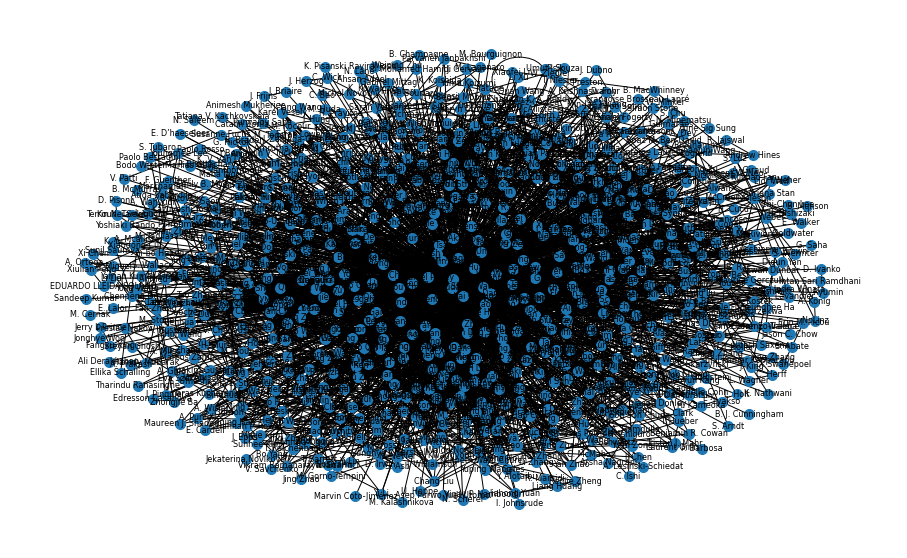

In [1]:
import csv
import networkx as nx

# Read CSV file and extract author names
filename = '../result4.csv'
authors = {}
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for author in author_list:
            author = author.strip()  # remove leading/trailing white space
            if author not in authors:
                authors[author] = 1
            else:
                authors[author] += 1

# Create graph and add nodes for authors with > 10 co-occurrences
G = nx.Graph()
for author, count in authors.items():
    if count > 10:
        G.add_node(author)

# Add edges for co-occurrences between authors with > 10 co-occurrences
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for i in range(len(author_list)):
            author_i = author_list[i].strip()
            if author_i in G.nodes():
                for j in range(i+1, len(author_list)):
                    author_j = author_list[j].strip()
                    if author_j in G.nodes():
                        if G.has_edge(author_i, author_j):
                            G[author_i][author_j]['weight'] += 1
                        else:
                            G.add_edge(author_i, author_j, weight=1)

# Print network information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw network using networkx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()


In [1]:
import csv
import networkx as nx
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

# Read CSV file and extract author names
filename = '../result4.csv'
authors = {}
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for author in author_list:
            author = author.strip()  # remove leading/trailing white space
            if author not in authors:
                authors[author] = 1
            else:
                authors[author] += 1

# Create graph and add nodes for authors with > 10 co-occurrences
G = nx.Graph()
for author, count in authors.items():
    if count > 10:
        G.add_node(author)

# Add edges for co-occurrences between authors with > 10 co-occurrences
with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        author_list = row['Author Name'].split(',')
        for i in range(len(author_list)):
            author_i = author_list[i].strip()
            if author_i in G.nodes():
                for j in range(i+1, len(author_list)):
                    author_j = author_list[j].strip()
                    if author_j in G.nodes():
                        if G.has_edge(author_i, author_j):
                            G[author_i][author_j]['weight'] += 1
                        else:
                            G.add_edge(author_i, author_j, weight=1)

# Create network layout
pos = nx.spring_layout(G, k=0.2)

# Create edge and node traces for plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    text=[],
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='Bluered',
        reversescale=True,
        color=[],
        size=10,
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)

    # Calculate node color based on degree centrality
    degree = nx.degree_centrality(G)[node]
    node_trace['marker']['color'] += (degree,)

    # Add node text (name and degree)
    text = f"{node}<br>Co-occurrences: {authors[node]}<br>Degree Centrality: {degree:.3f}"
    node_trace['text'] += (text,)

# Create figure with edge and node traces
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Author Co-occurrence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 )],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Create Dash app
app = dash.Dash(__name__)
server = app.server

# Create Dash layout
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

# Run Dash app
if __name__ == '__main__':
    app.run_server(debug=True)



ModuleNotFoundError: No module named 'dash'

(array([18.,  8., 15.,  4., 10.,  7.,  6.,  5.,  2.,  4.,  2.,  2.,  3.,
         8.,  1.,  1.,  2.,  0.,  3.,  2.,  2.,  2.,  3.,  1.,  2.,  3.,
         2.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

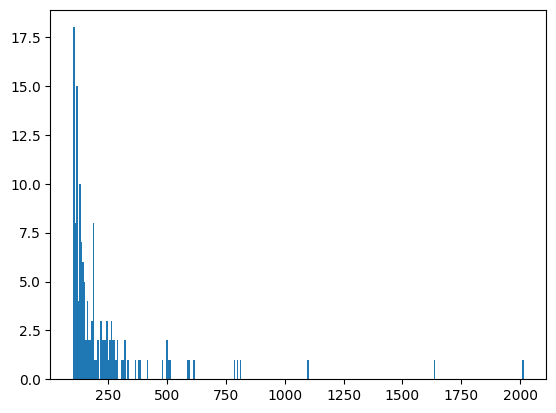

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file and extract author names
data=pd.read_csv('../result4.csv', usecols=['Paper Citation Count']).dropna()
# to hist
# log the data
# avoid not finite
data = data[data['Paper Citation Count'] > 100]
# data['Paper Citation Count'] = np.log10(data['Paper Citation Count'])
plt.hist(data['Paper Citation Count'], bins=300)

In [14]:
# count data
data = data.groupby('Paper Citation Count').count()